# First Project: Impact of Weather on Crime in Austin

In [111]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database

## Perform API Call - Austin Crime Data (data.austintexas.gov)

In [112]:
obj_crime = Crime()
json_crime = obj_crime.get_json_crime("2019-01-01T00:00:00", "2019-04-01T00:00:00")
df_crime = obj_crime.get_df_crime(json_crime)
df_crime

** Got OK response **


,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2019-01-01T00:04:00.000,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,2019-01-01T00:05:00.000,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,2019-01-01T00:05:00.000,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,2019-01-01T00:11:00.000,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,2019-01-01T00:11:00.000,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-04T18:13:00.000,20198000053,THEFT BY SHOPLIFTING,607,N,2018-12-11T00:00:00.000,GROCERY / SUPERMARKET,78723,23C,Theft,1546646400
996,2019-01-04T18:15:00.000,20195000486,DEBIT CARD ABUSE,1108,N,2018-12-31T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546646400
997,2019-01-04T18:22:00.000,201941365,THEFT FROM PERSON,610,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78752,23A,Theft,1546646400
998,2019-01-04T18:25:00.000,201941375,THEFT,600,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,23H,Theft,1546646400


## Perform API Call - Weather Data (Dark Sky)

In [113]:
# Create a weather object
obj_weather = Weather()

# Remove duplicated dates
epochs = df_crime["Epoch"].drop_duplicates()

# Get set of dates to request from Dark Sky
first_day = dt.datetime.fromtimestamp(min(df_crime["Epoch"]))
last_day = dt.datetime.fromtimestamp(max(df_crime["Epoch"]))
num_days = (last_day - first_day).days
one_day = dt.timedelta(1)
timestamps = [int((first_day + i * one_day).timestamp()) for i in range(num_days + 1)]

# Get weather data in json format
json_weather = []
for timestamp in timestamps:
    json_weather.extend(obj_weather.get_json_weather(timestamp))

In [114]:
# Get the dataframe version of the given json file
df_weather = obj_weather.get_df_weather(json_weather)
df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed,Moon Phase
0,1546322400,43.30,0.30,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,43.30,0,6.025,288,0.69,New Moon
1,1546326000,39.46,0.37,42.09,1.00,partly-cloudy-night,0.0,0.0,1017.8,Partly Cloudy,42.09,0,5.271,246,4.32,New Moon
2,1546329600,39.82,0.40,40.97,0.90,partly-cloudy-night,0.0,0.0,1018.5,Partly Cloudy,43.72,0,6.817,27,6.64,New Moon
3,1546333200,37.89,0.32,40.14,0.91,partly-cloudy-night,0.0,0.0,1019.3,Partly Cloudy,42.45,0,10.000,347,7.38,New Moon
4,1546336800,35.60,0.05,36.98,0.85,clear-night,0.0,0.0,1019.0,Clear,41.19,0,10.000,354,8.90,New Moon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1546650000,50.29,0.00,35.59,0.57,clear-night,0.0,0.0,1018.0,Clear,50.29,0,10.000,146,2.17,New Moon
92,1546653600,46.75,0.00,35.96,0.66,clear-night,0.0,0.0,1018.7,Clear,46.75,0,10.000,182,0.64,New Moon
93,1546657200,43.35,0.00,35.79,0.74,clear-night,0.0,0.0,1019.4,Clear,43.35,0,10.000,167,0.75,New Moon
94,1546660800,46.07,0.00,35.01,0.65,clear-night,0.0,0.0,1019.5,Clear,46.07,0,10.000,178,0.78,New Moon


## Merge Data Sources (Crime and Weather Data)

In [115]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="right")

## Clean Data 

In [116]:
df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,20198000053,THEFT BY SHOPLIFTING,607,N,2018-12-11T00:00:00.000,GROCERY / SUPERMARKET,78723,23C,Theft,1546646400
996,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,20195000486,DEBIT CARD ABUSE,1108,N,2018-12-31T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546646400
997,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,201941365,THEFT FROM PERSON,610,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78752,23A,Theft,1546646400
998,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,201941375,THEFT,600,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,23H,Theft,1546646400


# Store in a database

In [117]:
# obj_database = Database()
# obj_database.df_save(df_result)

## Plotting Part 1 - Crime Type vs. Weather Variables

#### Crime Rate vs. Temperature

In [118]:
df_1 = df_result[["Temperature", "Crime Type", "Date"]]
# df_1

In [119]:
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 109.99, 119.99, 9999]
temp_ranges = ["<0", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", ">120"]
df_1["Temperature Group"] = pd.cut(df_1["Temperature"], bins, labels = temp_ranges)
# df_1

/Users/carlosalzate/.local/share/virtualenvs/labs-1epcz9A2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
df_group = df_1.groupby(["Crime Type", "Temperature Group"])["Date"]
crime_counts = df_group.count()
hour_counts = df_group.nunique()
crime_rates = crime_counts / hour_counts
top5 = crime_rates.sort_values(ascending=False).head(5)
df_crime_rates = top5.to_frame()
df_crime_rates = df_crime_rates.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates

,Crime Type,Temperature Group,Crime Rate
0,THEFT,50-59,2.800000
1,BURGLARY OF VEHICLE,60-69,2.750000
2,BURGLARY OF VEHICLE,40-49,2.200000
3,FAMILY DISTURBANCE,40-49,2.083333
4,THEFT,30-39,2.066667


In [135]:
legend = df_crime_rates["Crime Type"].drop_duplicates()
legend

0                  THEFT
1    BURGLARY OF VEHICLE
3     FAMILY DISTURBANCE
Name: Crime Type, dtype: object

In [136]:
# Pivoting results dataframe
df_pivot = pd.pivot_table(df_crime_rates, values=["Crime Rate"], index =["Temperature Group"],
                   columns=["Crime Type"])

df_pivot

Crime Rate                             
Crime Type        BURGLARY OF VEHICLE FAMILY DISTURBANCE     THEFT
Temperature Group                                                 
30-39                             NaN                NaN  2.066667
40-49                            2.20           2.083333       NaN
50-59                             NaN                NaN  2.800000
60-69                            2.75                NaN       NaN

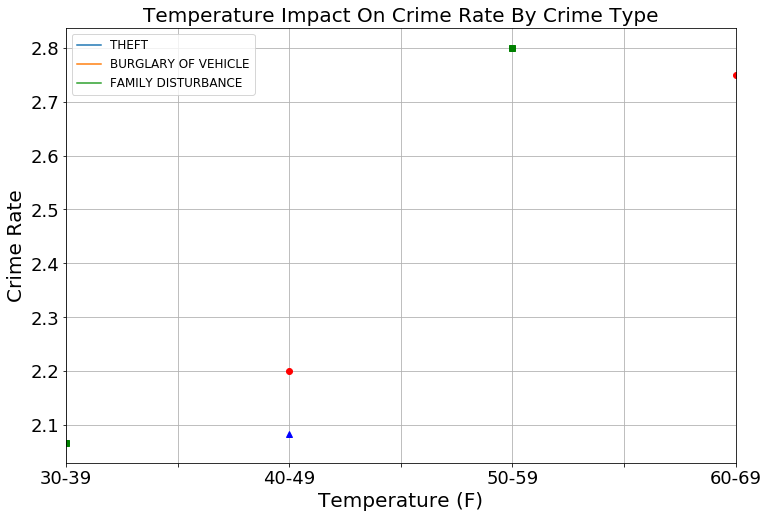

In [147]:
ax = df_pivot.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot.plot(figsize=(12,8), style=["ro:", "b^:", "gs:"], markersize=6, ax = ax, grid=True)
plt.title("Temperature Impact On Crime Rate By Crime Type", fontsize=20)
plt.legend(legend, fontsize=12)
plt.xlabel("Temperature (F)", fontsize=20)
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Type vs. Atmospheric Pressure

#### Crime Type vs. Humidity

#### Crime Type vs. Moon Phase

In [107]:
df_1 = df_result[["Moon Phase", "Crime Type", "Date"]]
df_1

,Moon Phase,Crime Type,Date
0,New Moon,FAMILY DISTURBANCE,1546322400
1,New Moon,DISTURBANCE - OTHER,1546322400
2,New Moon,BURGLARY NON RESIDENCE,1546322400
3,New Moon,CRASH/FAIL STOP AND RENDER AID,1546322400
4,New Moon,DWI,1546322400
...,...,...,...
995,New Moon,THEFT BY SHOPLIFTING,1546646400
996,New Moon,DEBIT CARD ABUSE,1546646400
997,New Moon,THEFT FROM PERSON,1546646400
998,New Moon,THEFT,1546646400


In [108]:
df_group = df_1.groupby(["Crime Type", "Moon Phase"])["Date"]
crime_counts = df_group.count()
hour_counts = df_group.nunique()
crime_rates = crime_counts / hour_counts
top5 = crime_rates.sort_values(ascending=False).head(5)
df_crime_rates = top5.to_frame()
df_crime_rates = df_crime_rates.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates

,Crime Type,Moon Phase,Crime Rate
0,BURGLARY OF VEHICLE,New Moon,2.146341
1,THEFT,New Moon,2.023810
2,FAMILY DISTURBANCE,New Moon,1.867925
3,DOC DISCHARGE GUN - PUB PLACE,New Moon,1.500000
4,PROTECTIVE ORDER,New Moon,1.500000


In [109]:
legend = df_crime_rates["Crime Type"]
df_pivot = pd.pivot_table(df_crime_rates, values=["Crime Rate"], index =["Moon Phase"],
                   columns=["Crime Type"])

df_pivot

Crime Rate                                \
Crime Type BURGLARY OF VEHICLE DOC DISCHARGE GUN - PUB PLACE   
Moon Phase                                                     
New Moon              2.146341                           1.5   

                                                         
Crime Type FAMILY DISTURBANCE PROTECTIVE ORDER    THEFT  
Moon Phase                                               
New Moon             1.867925              1.5  2.02381

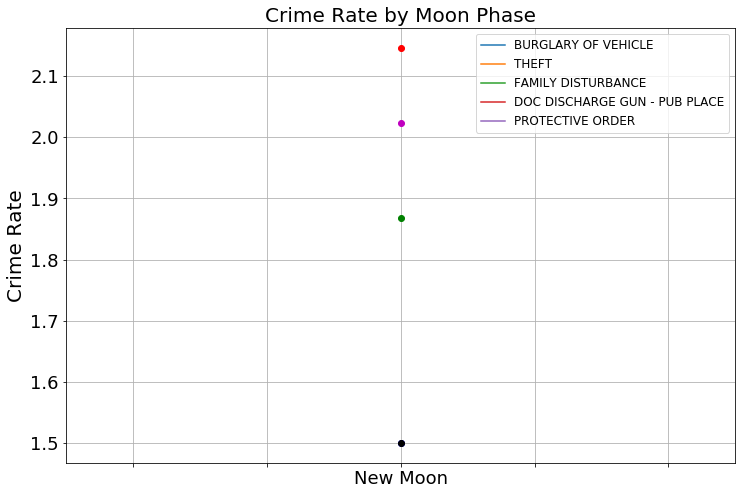

In [110]:
ax = df_pivot.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot.plot(figsize=(12,8), style=["ro", "bo", "go", "ko", "mo"], markersize=6, ax = ax, grid=True)
plt.title("Crime Rate by Moon Phase", fontsize=20)
plt.legend(legend, fontsize=12)
plt.xlabel("")
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

## Plotting Part 2 - Crime Location Type vs. Weather Variables 

#### Crime Location Type vs. Temperature

#### Crime Location Type vs. Atmospheric Pressure

#### Crime Location Type vs. Humidity

#### Crime Location Type vs. Moon Phase 

## Written Analysis and Conclusions